In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df = pd.read_excel("/content/drive/MyDrive/excel/Adidas US Sales Datasets.xlsx",sheet_name="Data Sales Adidas",header=3)

In [133]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [134]:
df.drop(df.columns[0],axis=1,inplace=True)

In [136]:
df.columns=df.iloc[0]

In [138]:
df = df.drop(df.index[0])
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9645,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9647,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [12]:
df[['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin']]=df[['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin']].apply(pd.to_numeric)

In [13]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

In [14]:
df['Total Sales']=df['Units Sold']*df['Price per Unit']

In [15]:
df['Operating Profit']=df['Total Sales']*df['Operating Margin']

In [16]:
df['Operating Margin']=df['Operating Margin'].map(lambda n:"{:,.2%}".format(n))

In [17]:
df['COGS'] = df['Total Sales']-df['Operating Profit']

In [18]:
df.describe()

3,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,COGS
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,12455.083955,4894.793501,7560.290454
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4065.250000,1753.440000,2164.215000
50%,2021-06-04 00:00:00,45.000000,176.000000,7803.500000,3262.980000,4252.560000
75%,2021-09-16 00:00:00,55.000000,350.000000,15864.500000,6192.360000,9750.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000,56700.000000
std,NaN,14.705397,214.252030,12716.392111,4866.464372,8343.876169


In [19]:
np.sum(df['Units Sold'])

np.int64(2478861)

In [20]:
df['Invoice Date'].value_counts()

,count
Invoice Date,
2021-01-17,77
2021-03-16,72
2021-04-17,72
2021-08-17,72
2021-11-17,71
...,...
2020-12-12,2
2020-12-13,2
2020-12-14,2


In [21]:
df.groupby(by="Invoice Date").sum()['Units Sold']

,Units Sold
Invoice Date,
2020-01-01,2361
2020-01-02,2310
2020-01-03,2302
2020-01-04,2085
2020-01-05,1917
...,...
2021-12-27,1314
2021-12-28,749
2021-12-29,557


In [22]:
df['Region'].value_counts()

,count
Region,
West,2448
Northeast,2376
Midwest,1872
South,1728
Southeast,1224


In [23]:
df[['City','State']].value_counts()

,,count
City,State,
Albuquerque,New Mexico,216
Atlanta,Georgia,216
Burlington,Vermont,216
Boston,Massachusetts,216
Boise,Idaho,216
Birmingham,Alabama,216
Hartford,Connecticut,216
Dallas,Texas,216
Philadelphia,Pennsylvania,216


In [24]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,COGS
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,30000.00,50.00%,In-store,30000.00
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,15000.00,30.00%,In-store,35000.00
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,14000.00,35.00%,In-store,26000.00
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,13387.50,35.00%,In-store,24862.50
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,16200.00,30.00%,In-store,37800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,28.00%,Outlet,2304.00
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,32.00%,Outlet,2927.40
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,37.00%,Outlet,4752.72
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,42.00%,Outlet,1705.20


##What is the most selling retailer?

In [25]:
top_retailer = df.groupby(by="Retailer",sort=True)['Operating Profit'].sum().reset_index()
top_retailer = top_retailer.sort_values(by=['Operating Profit'], ascending=[False])
print(top_retailer)

        Retailer  Operating Profit
5      West Gear       12196890.68
1    Foot Locker       11317027.31
3  Sports Direct       10641608.71
2         Kohl's        5182260.08
0         Amazon        3984432.06
4        Walmart        3902748.86


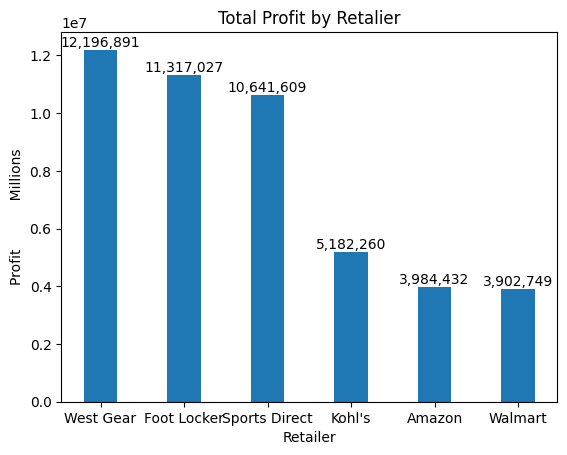

In [26]:
x = plt.bar(top_retailer['Retailer'] ,top_retailer['Operating Profit'],width=0.4,align="center")
plt.title("Total Profit by Retalier")
plt.ylabel("Profit           Millions")
plt.xlabel("Retailer")
plt.bar_label(x,fmt='{:,.0f}')
plt.show()

##What is the most selling state?

In [27]:
top_state = df.groupby(by="State")["Total Sales"].sum().reset_index()
top_state = top_state.sort_values(by="Total Sales",ascending=False)
print(top_state)

             State  Total Sales
31        New York    8670464.0
4       California    8580508.0
8          Florida    7820589.0
42           Texas    6612371.0
39  South Carolina    3593112.0
17       Louisiana    3377031.0
46      Washington    3222093.0
45        Virginia    3074415.0
36          Oregon    3047049.0
27          Nevada    2981134.0
32  North Carolina    2936581.0
30      New Mexico    2824641.0
11           Idaho    2742753.0
10          Hawaii    2734457.0
9          Georgia    2708591.0
5         Colorado    2569036.0
41       Tennessee    2567190.0
0          Alabama    2513424.0
28   New Hampshire    2339267.0
21        Michigan    2287283.0
49         Wyoming    2282342.0
34            Ohio    2269283.0
2          Arizona    2254096.0
23     Mississippi    2218609.0
44         Vermont    2041598.0
25         Montana    1930761.0
1           Alaska    1810428.0
3         Arkansas    1802672.0
6      Connecticut    1646448.0
20   Massachusetts    1578435.0
35      

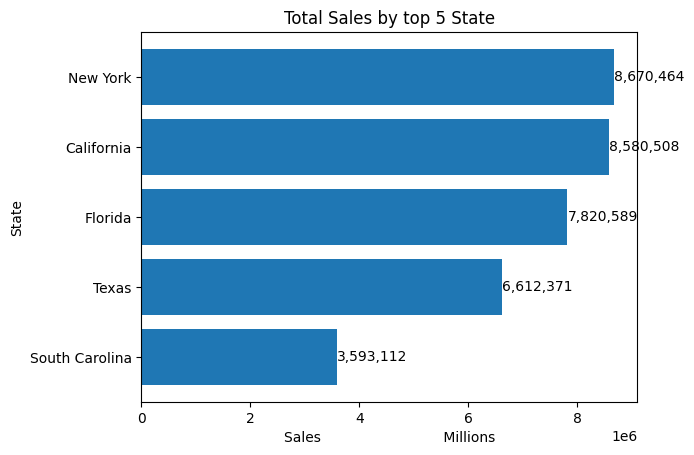

In [28]:
x = plt.barh(top_state['State'][4::-1],top_state['Total Sales'][4::-1],align="center")
plt.ylabel("State")
plt.xlabel("Sales                            Millions")
plt.title("Total Sales by top 5 State")
plt.bar_label(x,fmt="{:,.0f}")
plt.show()

##what is the most selling month?

In [84]:
df["Month_Year"] = df['Invoice Date'].dt.to_period("M")

In [85]:
top_month = df.groupby(by="Month_Year")['Operating Profit'].sum().reset_index()
top_month = top_month.sort_values(by=["Operating Profit"],ascending=False)

In [86]:
print(top_month)

   Month_Year  Operating Profit
18    2021-07        4098805.98
23    2021-12        4078123.30
19    2021-08        3852859.51
16    2021-05        3456570.88
20    2021-09        3443571.79
17    2021-06        3429736.01
22    2021-11        3101992.69
21    2021-10        2987755.39
12    2021-01        2766160.35
15    2021-04        2644237.72
13    2021-02        2282519.76
14    2021-03        2067129.24
3     2020-04        1275442.09
7     2020-08        1042648.29
8     2020-09         975908.69
0     2020-01         883774.16
2     2020-03         879268.76
4     2020-05         800635.70
1     2020-02         796848.19
6     2020-07         681477.61
9     2020-10         582342.96
10    2020-11         402807.49
11    2020-12         387304.98
5     2020-06         307046.16


In [100]:
df["Quarter"] = df['Invoice Date'].dt.to_period("Q")

In [101]:
top_Quarter = df.groupby(by="Quarter")['Operating Profit'].sum().reset_index()
top_Quarter= top_Quarter.sort_values(by=["Quarter"],ascending=True)

In [102]:
top_Quarter['Quarter'] = top_Quarter['Quarter'].astype(str)

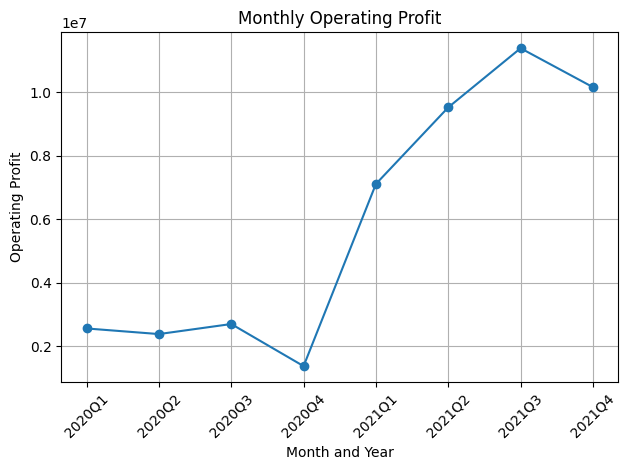

In [103]:
plt.plot(top_Quarter['Quarter'], top_Quarter['Operating Profit'], marker='o')
plt.xlabel('Quarter and Year')
plt.ylabel('Operating Profit')
plt.title('Quarterly Operating Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##What is the highest grossing and most popular product?

In [32]:
z = df.groupby(by="Product")[["Total Sales",'Units Sold']].sum().reset_index()
z = z.sort_values(by=['Total Sales'],ascending=False)
print(z)

3                    Product  Total Sales  Units Sold
2      Men's Street Footwear   27680769.0      593320
3            Women's Apparel   23870985.0      433827
1    Men's Athletic Footwear   20577180.0      435526
5    Women's Street Footwear   17201563.0      392269
0              Men's Apparel   16520632.0      306683
4  Women's Athletic Footwear   14315521.0      317236


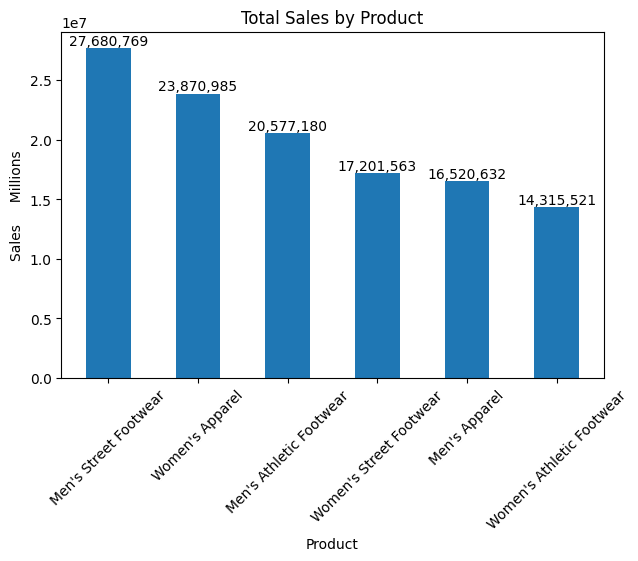

In [83]:
plt.figure(figsize=(7,4.5))
x = plt.bar(z['Product'],z['Total Sales'],width=0.5)
plt.title("Total Sales by Product")
plt.ylabel("Sales     Millions")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.bar_label(x,fmt="{:,.0f}")
plt.show()

##Do low-cost products generate high revenue?

<Axes: xlabel='COGS', ylabel='Total Sales'>

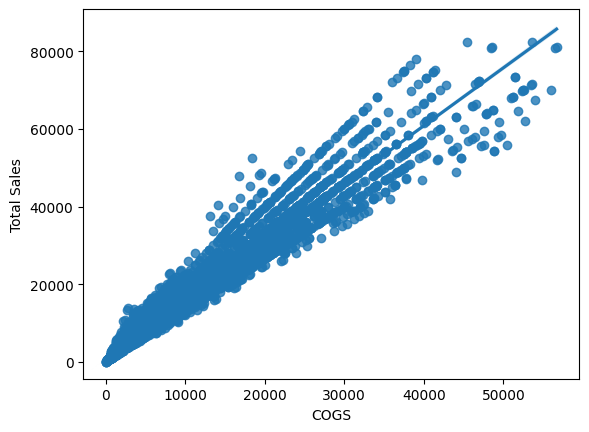

In [33]:
sns.regplot(data = df,x = "COGS",y="Total Sales")

## What is the most commonly used selling method?

In [42]:
x = df['Sales Method'].value_counts()

In [61]:
y = ['Online', 'Outlet', 'In-store']

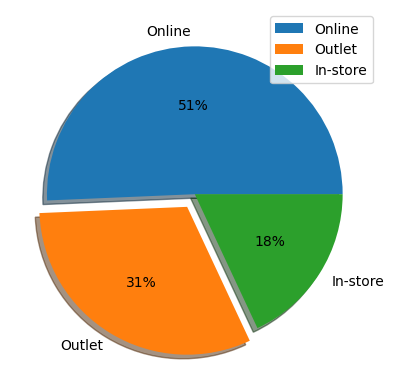

In [68]:
plt.pie(x,labels=y,autopct="%1.f%%",shadow=True,explode=(0,0.1,0))
plt.legend()
plt.show()

##Distribution_units_sold

In [35]:
Distribution_units_sold = df.groupby(by='Invoice Date')["Units Sold"].sum()

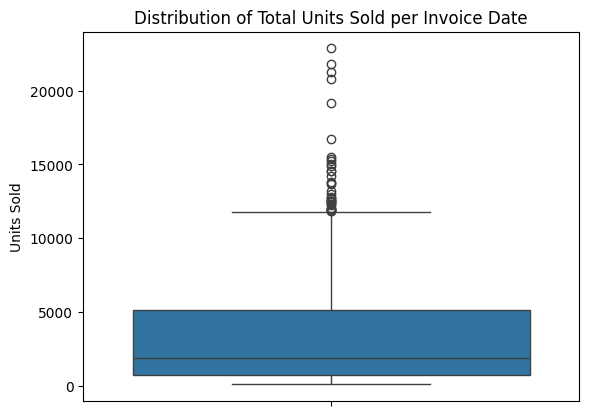

In [36]:
sns.boxplot(y=Distribution_units_sold)
plt.title("Distribution of Total Units Sold per Invoice Date")
plt.show()

##What is the highest grossing retailer in each city?

In [37]:
top__retailer_per_city=df.groupby(by=['City','Retailer'])['Total Sales'].sum().reset_index()
top__retailer_per_city = top__retailer_per_city.sort_values(by=["Total Sales"],ascending=False)
top__retailer_per_city = top__retailer_per_city.groupby(by=['City']).head(1).reset_index(drop=True)

In [38]:
print(top__retailer_per_city)

              City       Retailer  Total Sales
0    San Francisco      West Gear    4760647.0
1      Los Angeles         Kohl's    3578910.0
2         New York    Foot Locker    3554143.0
3       Charleston    Foot Locker    3449802.0
4         Portland      West Gear    3118632.0
5          Seattle      West Gear    3043300.0
6          Orlando        Walmart    2992039.0
7        Las Vegas      West Gear    2981134.0
8           Dallas  Sports Direct    2923048.0
9      New Orleans      West Gear    2903868.0
10         Houston        Walmart    2735620.0
11        Richmond    Foot Locker    2579593.0
12          Denver      West Gear    2569036.0
13          Albany      West Gear    2540540.0
14       Knoxville  Sports Direct    2521590.0
15       Charlotte  Sports Direct    2477780.0
16      Birmingham  Sports Direct    2455333.0
17     Albuquerque         Kohl's    2427465.0
18         Atlanta  Sports Direct    2109748.0
19        Columbus         Amazon    2068448.0
20        Che

##Total sales and profit and COGS


In [39]:
df[['Total Sales','Operating Profit','COGS']].sum()

,0
3,
Total Sales,120166650.0
Operating Profit,47224967.7
COGS,72941682.3


##What is the average price in each Region?

In [40]:
AVG_price_regoin=df.groupby(by=["Region"])['Price per Unit'].mean()

##What percentage of revenue is from all sales?

In [41]:
percentage_of_revenue = df['Operating Profit'].sum()/df['Total Sales'].sum()
percentage_of_revenue = percentage_of_revenue*100
print(percentage_of_revenue)

39.29956248260229
